# Exploratory Data Analysis (EDA)

#### 1. Introduction to EDA
#### 2. Gender Distribution
#### 3. Age Distribution
#### 4. Annual Income Distribution
#### 5. Spending Score Distribution
#### 6. Income vs Spending Score Analysis
#### 7. RFM Feature Construction (Proxy-Based)
#### 8. RFM Histograms
#### 9. Key EDA Insights

Exploratory Data Analysis (EDA) helps in understanding the structure,
distribution, and relationships within the dataset. This step is
crucial before applying clustering algorithms.

## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## Loading the Dataset

In [5]:
df = pd.read_csv("Mall_Customers.csv")

## Gender Distribution


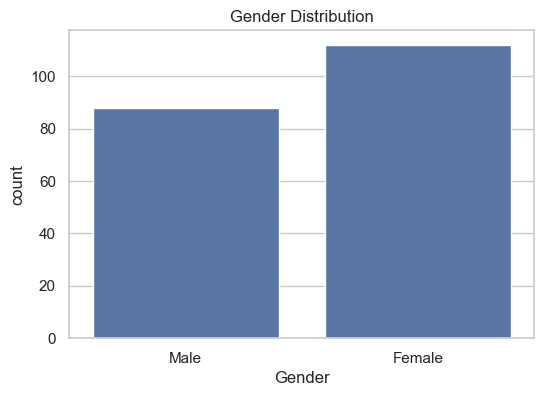

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

+ Observation
  + The dataset includes both male and female customers.
  + The gender distribution is relatively balanced.

## Age Distribution

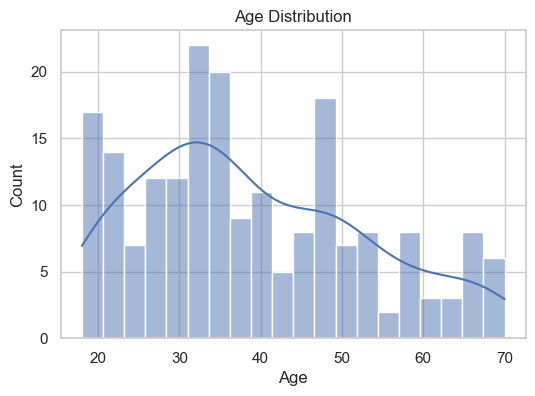

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

+ Observation
  + Most customers are in the 30-40 years age range.
  + Most customers fall within young to middle-aged groups.
 

## Annual Income Distribution

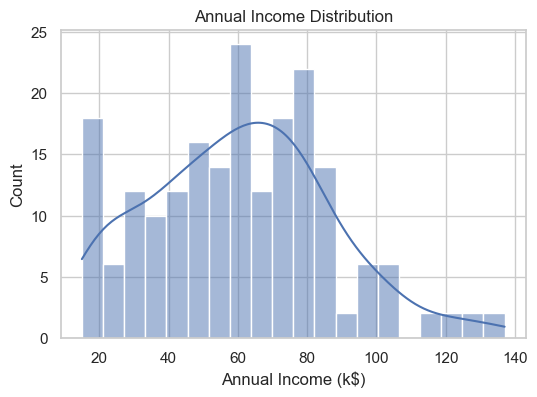

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Count")
plt.show()

+ Observation
  - Annual income varies significantly among customers.
  - A smaller number of customers belong to very high-income groups.

## Spending Score Distribution

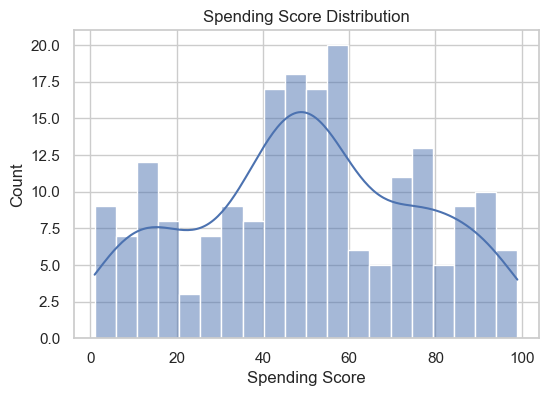

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Count")
plt.show()

- Spending Score varies widely across customers.
- Indicates diverse purchasing behaviors.

## Annual Income vs Spending Score

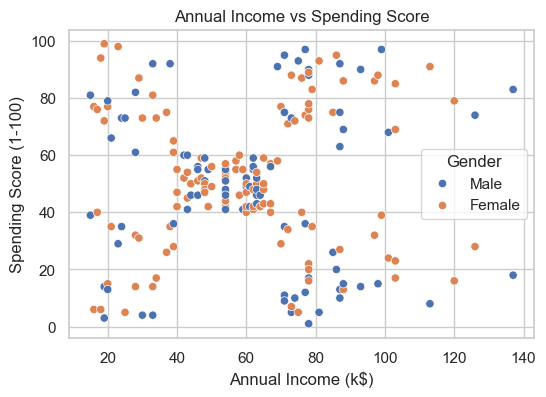

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    data=df
)
plt.title("Annual Income vs Spending Score")
plt.show()

- Customers with similar income levels often exhibit very different spending behavior.
- This confirms that income alone is not sufficient for customer segmentation.

## 6. RFM Feature Construction (Proxy-Based)

The dataset does not contain transactional data required for true RFM analysis
(such as purchase dates and transaction counts). Therefore, proxy variables
are constructed as follows:

- Recency: Inverse of Spending Score
- Frequency: Annual Income
- Monetary: Spending Score

In [11]:
rfm_df = df.copy()

rfm_df['Recency'] = 100 - rfm_df['Spending Score (1-100)']
rfm_df['Frequency'] = rfm_df['Annual Income (k$)']
rfm_df['Monetary'] = rfm_df['Spending Score (1-100)']

rfm_df[['Recency', 'Frequency', 'Monetary']].head()

,Recency,Frequency,Monetary
0,61,15,39
1,19,15,81
2,94,16,6
3,23,16,77
4,60,17,40


## RFM Histogram

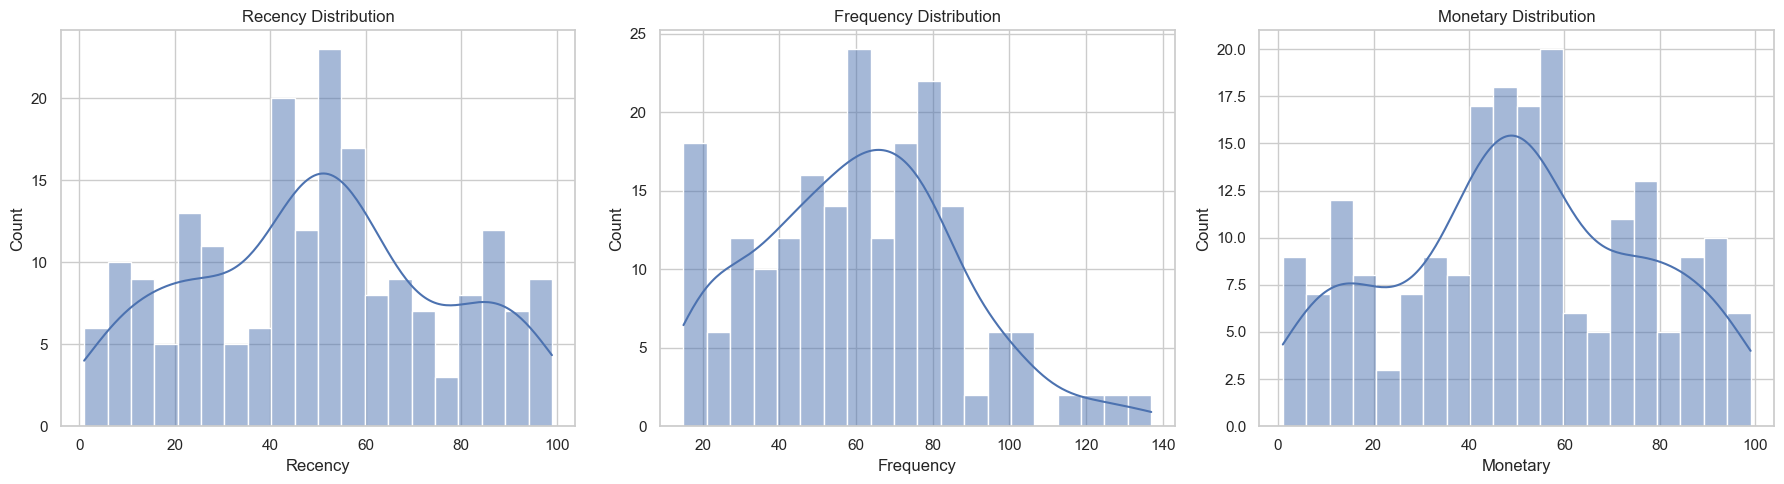

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_df['Recency'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Recency Distribution")

sns.histplot(rfm_df['Frequency'], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm_df['Monetary'], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Monetary Distribution")

plt.tight_layout()
plt.show()

- Recency shows wide variation in customer engagement levels.
- Frequency (income proxy) is right-skewed, indicating fewer high-income customers.
- Monetary distribution highlights multiple spending segments.

## Summary

+ The dataset contains both customer details (age, gender, income) and spending behavior, which makes it suitable for customer segmentation.

+ Customers with the same annual income often have very different spending scores, showing that income alone cannot explain customer behavior.

+ Spending Score is the most important feature, as it directly reflects how actively a customer spends at the mall.

+ Age distribution shows that most customers are young to middle-aged, indicating a key target demographic for marketing.

+ RFM analysis shows that customers differ significantly in recency, frequency, and monetary value, which confirms the presence of multiple customer groups.

+ Some customers have high income but low spending, while others have moderate income but high spending, highlighting different marketing opportunities.

+ These variations indicate that customers cannot be treated as a single group and clustering is required to identify meaningful segments.
